**Decision Tree Algorithm**

In [ ]:
import pandas as pd
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

In [ ]:
#read column names
myColumns = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
#load dataset
data = pd.read_csv("/content/diabetes.csv", header = None, names = myColumns)
print('file reading is done')

file reading is done


In [ ]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
#split dataset in features and target variables

feature_cols =  ['pregnant','insulin','glucose','bp','pedigree']
x= data.drop('label',axis=1) #features
y= data['label'] #target variable
x= x[1:x.size]
y= y[1:y.size]
print('x=',x)
print('y=',y)

x=     pregnant glucose  bp skin insulin   bmi pedigree age
1          6     148  72   35       0  33.6    0.627  50
2          1      85  66   29       0  26.6    0.351  31
3          8     183  64    0       0  23.3    0.672  32
4          1      89  66   23      94  28.1    0.167  21
5          0     137  40   35     168  43.1    2.288  33
..       ...     ...  ..  ...     ...   ...      ...  ..
764       10     101  76   48     180  32.9    0.171  63
765        2     122  70   27       0  36.8     0.34  27
766        5     121  72   23     112  26.2    0.245  30
767        1     126  60    0       0  30.1    0.349  47
768        1      93  70   31       0  30.4    0.315  23

[768 rows x 8 columns]
y= 1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: object


In [ ]:
#split dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1) #70% training and 30% test set
print('x train size = ', x_train.size, 'y_train.size =', y_train.size )
print('x test size = ', x_test.size, 'y_test.size =', y_test.size )
print(x_test)

x train size =  4296 y_train.size = 537
x test size =  1848 y_test.size = 231
    pregnant glucose  bp skin insulin   bmi pedigree age
286        7     136  74   26     135    26    0.647  51
102        1     151  60    0       0  26.1    0.179  22
582        6     109  60   27       0    25    0.206  27
353        3      61  82   28       0  34.4    0.243  46
727        1     116  78   29     180  36.1    0.496  25
..       ...     ...  ..  ...     ...   ...      ...  ..
242        4      91  70   32      88  33.1    0.446  22
600        1     109  38   18     120  23.1    0.407  26
651        1      91  54   25     100  25.2    0.234  23
12        10     168  74    0       0    38    0.537  34
215        9     112  82   32     175  34.2     0.26  36

[231 rows x 8 columns]


In [ ]:
"""
myDT = DecisionTreeClassifier()

myDT = myDT.fit(x_train,y_train)
"""

In [ ]:
"""
y_pred = myDT.predict(x_test)
print('predictions = ', y_pred)
"""

predictions =  ['0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '1'
 '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '1'
 '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0'
 '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0']


In [ ]:
#print("Accuracy of model is =", metrics.accuracy_score(y_test,y_pred))

Accuracy of model is = 0.70995670995671


In [ ]:
"""
myDT = DecisionTreeClassifier(criterion="entropy", max_depth=3)

feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
X = data[feature_cols]
Y = data.label
X= X[1:X.size]
Y = Y[1:Y.size]

print('X = ', X)
print('Y =', Y)
"""

X =      pregnant glucose  bp skin insulin   bmi pedigree age
1          6     148  72   35       0  33.6    0.627  50
2          1      85  66   29       0  26.6    0.351  31
3          8     183  64    0       0  23.3    0.672  32
4          1      89  66   23      94  28.1    0.167  21
5          0     137  40   35     168  43.1    2.288  33
..       ...     ...  ..  ...     ...   ...      ...  ..
764       10     101  76   48     180  32.9    0.171  63
765        2     122  70   27       0  36.8     0.34  27
766        5     121  72   23     112  26.2    0.245  30
767        1     126  60    0       0  30.1    0.349  47
768        1      93  70   31       0  30.4    0.315  23

[768 rows x 8 columns]
Y = 1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: object


In [ ]:

#FEATURE SELECTION ALGORITHM
#create decision tree classifier
max_depths = [1,2,3,4,5,6]
feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
accuracy= []
ind =[]
for i in max_depths:
  myDT = DecisionTreeClassifier(criterion ="entropy", max_depth=i)
  rfe= RFE(myDT,n_features_to_select=6)
  x_train_rfe = rfe.fit_transform(x_train,y_train)
  x_test_rfe = rfe.transform(x_test)

  #train decision tree model
  myDT.fit(x_train_rfe,y_train)

  #print response for test dataset
  y_pred = myDT.predict(x_test_rfe)

  #print('Predictions = ', y_pred)
  #model accuracy
  print("Accuracy of model is = ", metrics.accuracy_score(y_test,y_pred))
  accuracy.append(metrics.accuracy_score(y_test,y_pred))
  ind.append(i)


Accuracy of model is =  0.7619047619047619
Accuracy of model is =  0.7705627705627706
Accuracy of model is =  0.7705627705627706
Accuracy of model is =  0.7922077922077922
Accuracy of model is =  0.7748917748917749
Accuracy of model is =  0.7662337662337663


<BarContainer object of 6 artists>

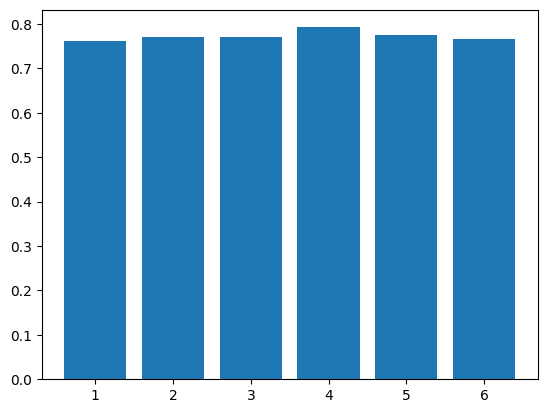

In [ ]:
import matplotlib.pyplot as plt
plt.bar(ind,accuracy)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
myDT1 = DecisionTreeClassifier(random_state = 42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(myDT1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

# Train the Decision Tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = best_dt_classifier.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.4f}")
print("Best Hyperparameters:", best_params)


Accuracy: 0.7879
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
%%shell
jupyter nbconvert --to html /content/2589545_tutorial2.ipynb

[NbConvertApp] Converting notebook /content/2589545_tutorial2.ipynb to html
[NbConvertApp] Writing 625223 bytes to /content/2589545_tutorial2.html
